In [2]:

import numpy as np                         
                                            
import pylab                                
import matplotlib                           
import matplotlib.gridspec as gridspec      
                                           
                                           
import scipy

import astropy.io.fits as fits             
                                           
from astropy.wcs import WCS                 
from astropy import units as u              

import pyspeckit as psk                     
                                            
                                           
from spectral_cube import SpectralCube     

from reproject import reproject_interp     
from reproject.mosaicking import find_optimal_celestial_wcs 


                                            
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

                                            
%matplotlib inline                             

matplotlib.rc('font', family='sans-serif')  
matplotlib.rc('text', usetex=True)      





## Importing Data

In [3]:
path="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
image, header = fits.getdata(path, header=True)
#print(header)

## Coordinate System

In [4]:
w1=WCS(header)
print(w1)
w1=w1.dropaxis(2)
w1=w1.dropaxis(2)
image_2D = pylab.squeeze(image)
print("The current image shape is: ", np.shape(image)) 
w1.array_shape


WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 266.5881835581  -28.5946602585  107762836559.5  1.0  
CRPIX : 176.0  176.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -7.777777794355e-05  7.777777794355e-05  15249772235.24  1.0  
NAXIS : 350  350  1  1
The current image shape is:  (1, 1, 350, 350)


(350, 350)

## Displaying Images

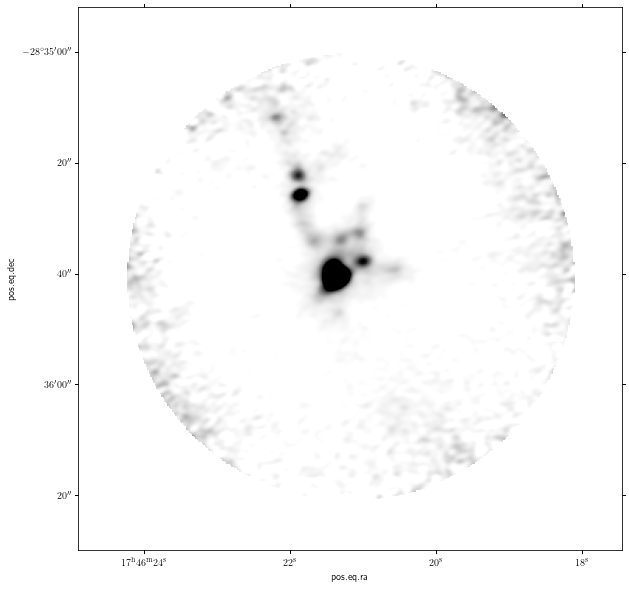

In [5]:
fig1 = pylab.figure(1,figsize=(10,10))    
ax1 = pylab.subplot(projection=w1)  
RA = ax1.coords[0]
Dec = ax1.coords[1]
im1 = pylab.imshow(image_2D,cmap='Greys',vmin=0, vmax=0.005)
###What am I looking at?


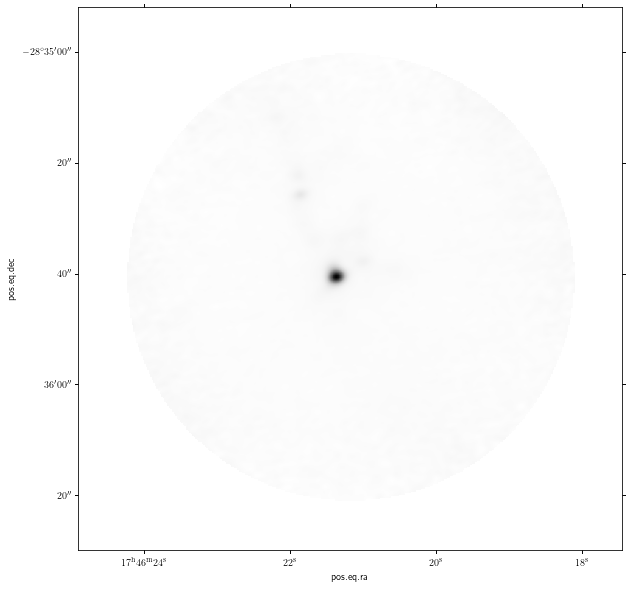

In [6]:
fig1 = pylab.figure(1,figsize=(10,10))    
ax1 = pylab.subplot(projection=w1)  
RA = ax1.coords[0]
Dec = ax1.coords[1]
im1 = pylab.imshow(image_2D,cmap='Greys')

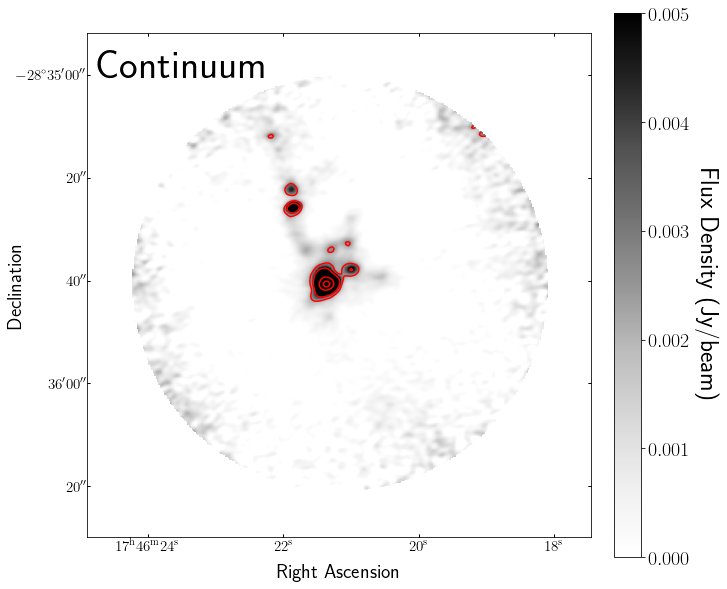

In [7]:
fig1 = pylab.figure(1,figsize=(10,10))    
ax1 = pylab.subplot(projection=w1)  
RA = ax1.coords[0]
Dec = ax1.coords[1]
im1 = pylab.imshow(image_2D,cmap='Greys',vmin=0, vmax=0.005)
RA.set_ticks(size=-3)
Dec.set_ticks(size=-3)
pylab.annotate('Continuum',fontsize=40,xy=(0.02,0.91),xycoords="axes fraction")
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
cb=pylab.colorbar(im1,fraction=0.056,pad=0.04)
cb.set_label(label="Flux Density (Jy/beam)", fontsize=25,rotation=270, labelpad=30)
cb.ax.tick_params(which = 'major', labelsize = 20)
pylab.contour(image_2D,[.0025,.005,.025,.05],colors='red')

## Moment Maps: Approach 1

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 266.5881835581  -28.5946602585  
CRPIX : 145.0  145.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -9.444444468667e-05  9.444444468667e-05  
NAXIS : 288  288
9.855915


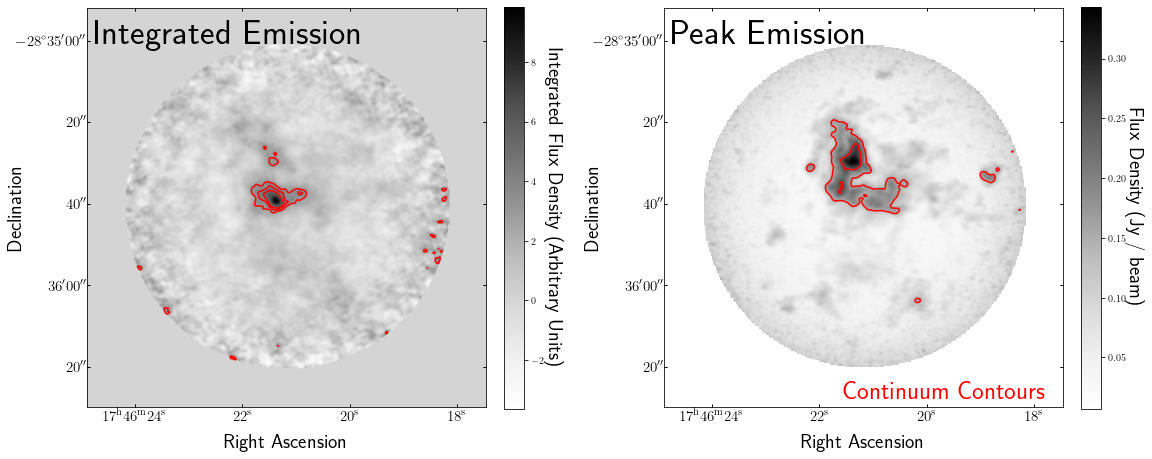

In [8]:
#import a new file
new_path="A.Dust_Ridge_12C18O.cube.I.pbcor.fits"
cheader = fits.getheader(new_path)
cube = pylab.squeeze(fits.getdata(new_path))
#print(cheader)
w2=WCS(cheader)
###is this step neccesary? 
### this is the step that keeps messing everything up
### WCS is image specific 
w2=w2.dropaxis(3)
w2=w2.dropaxis(2)
print(w2)
#math behind moment maps:  https://bit.ly/3XE8I8S

mom_0=np.nansum(cube, axis=0)
maxval = np.nanmax(cube,axis=0)
###axis 0 does in fact not respond to freq. 

#I copy and pasted this bit
print(np.nanmax(mom_0))
fig1 = pylab.figure(1,figsize=(15,7.5))
ax1 = pylab.subplot(1,2,1,projection=w2) 
RA = ax1.coords[0]                                                                  # 
Dec = ax1.coords[1]
im1 = pylab.imshow(mom_0,cmap='Greys') 
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Integrated Flux Density (Arbitrary Units)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate('Integrated Emission',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction") 
pylab.contour(mom_0,[3,4,5],colors='red')
###what contour do I use 
###how to determine contour lines?
    #I've been using trial and error?
    #bar on side



ax2 = pylab.subplot(1,2,2, projection=w2)
RA = ax2.coords[0]                                                                  # 
Dec = ax2.coords[1]
im2=pylab.imshow(maxval,cmap='Greys')
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0) 
ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im2,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Flux Density (Jy / beam)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)  
pylab.annotate('Peak Emission',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction")  
pylab.contour(maxval,[0.15,0.25,0.35],colors='red')
###what contour do I use
pylab.annotate('Continuum Contours',fontsize=25,xy=(0.45,0.02),xycoords="axes fraction",color='red') 
pylab.tight_layout(w_pad=10) 
#end copy and paste



## Moment Maps: Approach 2

In [9]:
#run above cell first
sc=SpectralCube.read(new_path)

#cube = pylab.squeeze(fits.getdata(new_path))
#w = WCS(newpath)
#sc = SpectralCube(data=cube,wcs=w)




## Plotting Spectra

In [ ]:
files=pylab.array([A.Dust_Ridge_12C18O.cube.I.pbcor.fits],[A.Dust_Ridge_13C16O.cube.I.pbcor.fits])
for i,file in enumerate(files):
    sc=SpectralCube.read(file)
    sc_kms=sc.with_spectral_unit(-100*u.km/u.s,200.*u.km/u.s)
    sc_slab=sc_kms.spectral_slab(-100. *u.km / u.s, 200. *u.km / u.s)
    sc_slab.allow_huge_operations=True
    sc_bin = sc_slab.downsample_axis(3,axis=0)
    ###???
    sc_K_kms = sc_bin.to(u.K)
    ### whats binning??
    ###Whats the spectral axis
    
    if i==0:
        vel, dec, ra = sc_K_kms.world[:,0,0]            # Grab the velocity axis of 12CO to use for rebinning
        sc_12CO = sc_K_kms.unmasked_copy()
    if i==1:
        sc_13CO = sc_K_kms.unmasked_copy()
    if i==2:
        sc_C18O = sc_K_kms.unmasked_copy()
    if i==3:
        sc_C17O = sc_K_kms

In [25]:
size=str(144)
print("circle[["+size+"pix, "+size+"pix], 100pix], ICRS" )

circle[[144pix, 144pix], 100pix], ICRS
